### Geração de Séries Temporais Utilizando Redes Generativas Adversárias: da Teoria à Prática

#### XXVIII Simpósio Brasileiro de Sistemas Multimídia e Web
**Minicurso 4, 7 de Novembro de 2022**

Iran F. Ribeiro (UFES), Breno Krohling (UFES), Giovanni Comarela (UFES), Vinícius F. S. Mota (UFES)


<div>
    iran.ribeiro@edu.ufes.br
    <img align='right' src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/logos.png?raw=True" width=400>
    </div>

### Organização do Minicurso

- [Introdução](#introducao)
- [Introdução à Séries Temporais](#intro-ts)
- [Introdução ao Aprendizado de Máquinas](#intro-am)
- [Introdução às Redes Generativas Adversárias](#intro-gans)
- [Handson](#hands-on)

<a name="introducao"></a>
# Introdução



<center><img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/exemplos_ts_intro.png?raw=True" alt="ExemplosIntro" width=1200/></center>


<div style="font-size: 15px">
    <ul>
        <li> [1] Shahbaz, Muhammad, et al. "Does financial development reduce CO2 emissions in Malaysian economy? A time series analysis." <i>Economic Modelling 35</i> (2013): 145-152.</li>
        <li><a href="https://www.waze.com/pt-BR/live-map">[2] Waze</a></li>
    </ul>
<div>

## Por que gerar dados?

Um conjunto de dados pode conter informações que limitam ou impedem a sua utilização:
*   Informações sigilosas de empresas
    - Webmedia challenge
* Informações sensíveis de pessoas
    - Trajetórias feitas por uma pessoa ao longo do tempo
    - Transições entre estações bases de uma rede sem fio
        - Bikesharing, Eduroam


### Desafios do mundo real

- Erros
- Lacunas
- Políticas de privacidade dos dententores dos dados
- Leis de proteção de dados


Mas... e seu eu encontrar uma forma compartilhar os dados sem comprometer a privacidade dos usuários ou dados sigilosos de uma empresa?

Para isso, duas perguntas principais precisam ser respondidas:



1.  Como gerar modelos de dados sintéticos a partir de dados brutos?
2.  Como mensurar a qualidade dos modelos gerados?

## Do que se trata esse minicurso?

- Como analisar séries temporais
- Como gerar séries temporais
- Como avaliar modelos geradores de séries temporais

### Por que GANs?

- Arquitetura adaptável e com eficiência avaliada em diferentes áreas
- Vasta literatura
- Diversas oportunidades de pesquisa 

<a name="intro-ts"></a>
# Introdução à Séries Temporais

<center>
  <img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/ts_stocks.jpeg" alt="ts" width=500/>    
</center>

O que é uma série temporal?

Conjunto de informações registradas no tempo. Exemplo:

<center>
<img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/exemplos_ts.png?raw=True" alt="SeriesTemporais" width=700/></center>




Algumas propriedades:




*   Sazonalidade
*   Tendência
*   Irregularidades





## Entendendo séries temporais


**Puramente aleatório**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotting as p
plt.style.use("seaborn")
rnd = np.random.RandomState(42)

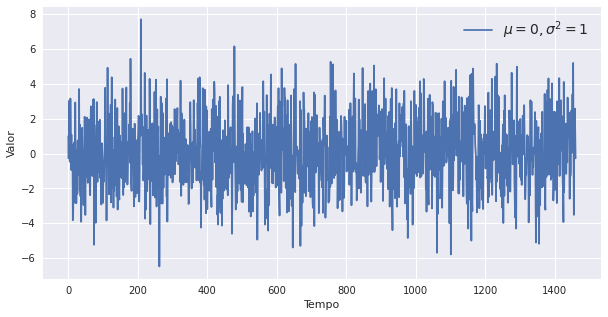

In [2]:
time = np.arange(4 * 365 + 1)
noise_level = 2
noise = p.white_noise(time, noise_level, seed=42)
p.plot_series([time], [noise], label=["$\mu=0, \sigma^2=1$",""])

* Passeio aleatório

   Considerando que $\{Z_t\}$ seja um processo puramente aleatório com média $\mu$ e variância $\sigma^2_z$. Um processo $\{X_t\}$ será um passeio aleatório se $X_t = X_{t - 1} + Z_t$.

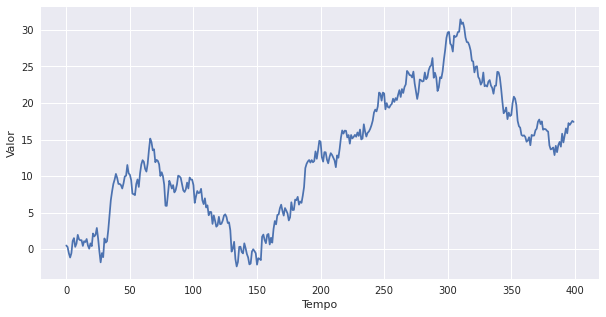

In [3]:
X, Zt = rnd.randn(len(time)), rnd.randn(len(time))
for t in range(1,len(time)):
    X[t] = X[t-1]+Zt[t]
zoom=400
p.plot_series([time[:zoom]], [X[:zoom]], label=[None])

* Médias móveis

  Considerando que $\{Z_t\}$ seja um processo puramente aleatório com média $\mu$ e variância $\sigma^2_z$, um processo $\{X_t\}$ será de médias móveis de ordem $q$ se:

\begin{equation}
\small
X_t = \beta_0Z_t + \beta_1Z_{t-1} + ... +\beta_qZ_{t-q}.
\end{equation}

onde ${\beta_i}$, com $i = 0,...,q$, são constantes. Esse processo é representado por $MA(q)$.

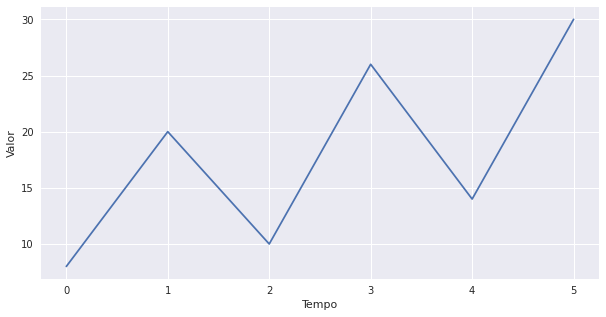

In [5]:
X = [8, 20, 10, 26, 14, 30]
tempo = np.arange(0,6)
p.plot_series([tempo], [X], label=[None])

<center><img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/ma_gif.gif?raw=True" width=1000></center>

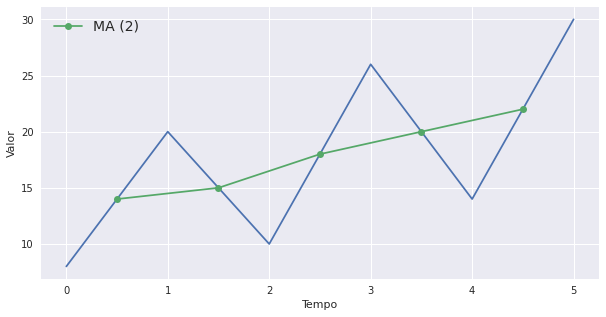

In [6]:
XMA = [14, 15, 18, 20, 22]
p.plot_series([tempo, tempo[:-1]+0.5], [X, XMA], label=[None, "MA (2)"])

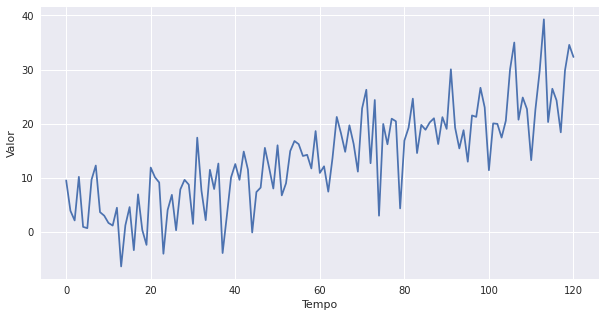

In [9]:
time = np.arange(4*30+1)
noise = p.white_noise(time, noise_level=5, seed=42)
X = p.trend(time, 0.2) + p.seasonality(time, period=7, amplitude=7) + noise
p.plot_series([time], [X], label=[None])

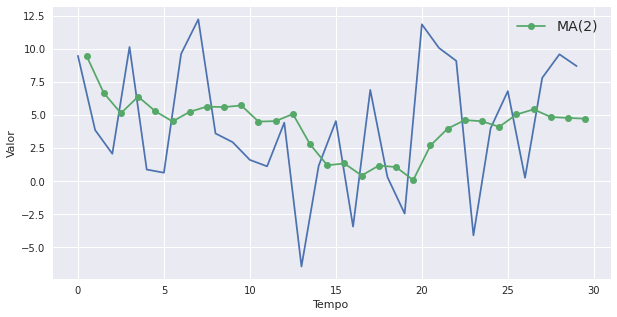

In [10]:
zoom=30
ma = pd.Series(X).rolling(7, min_periods=1).mean()

p.plot_series([time[:zoom], time[:zoom]+0.5], [X[:zoom], ma[:zoom]], label=[None, "MA(2)"])

* Auto-regressivo

  Sendo $\{Z_t\}$ um processo puramente aleatório com média $\mu$ e variância $\sigma^2_z$, um processo $\{X_t\}$ será auto-regressivo de ordem $p$, $AR(p)$, se:

\begin{equation}
\small
        X_t = \alpha_1X_{t-1}+...+\alpha_pX_{t-p} + Z_t.
\end{equation}

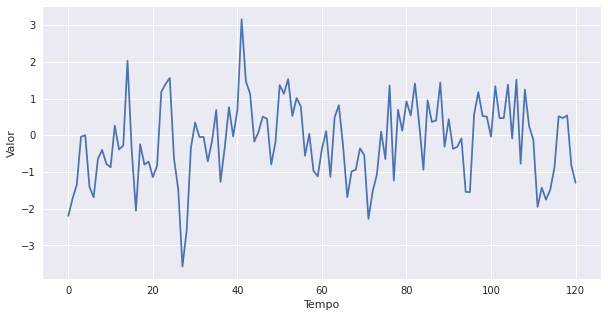

In [19]:
X = rnd.randn(len(time))
a1=0.5
for t in range(1,len(time)):
    zt = rnd.randn(1)
    X[t] = a1*X[t-1]+zt
p.plot_series([time], [X], label=[None])

### Estacionariedade

Um conceito importante em séries temporais é o de estacionariedade. Muitos dos processos utilizados para caracterização de uma série temporal assume que a série em estudo é estacionária, ou seja, a média matem-se constante ao longo do tempo.

## ARIMA

- O ARIMA (*Auto-Regressive Integrated Moving Average*) é utilizado em séries temporais não-estacionárias
- Três parâmetros: $p$ (auto-regressivo), $q$ (médias móveis) e $d$ (diferenciações) que podem ser estimados a partir de diversas metodologias, sendo a metodologia de Box & Jenkins a mais conhecida.

### Identificação do Processo

A série é estacionária? Se sim, o parâmetro $d=0$.
<center>
<img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/serie_estacionaria.png?raw=True" alt="SerieEstacionaria" width=500></center>

Os parâmetros $p$ e $q$ podem ser estimados apartir de análise dos gráficos de autocorrelação parcial (*PACF*) e autocorrelação (*ACF*):

<center>
<img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/pacf_acf.png?raw=True" alt="Autocorrelacao" width=900/>
</center>

### Estimando os parâmetros

Nesta etapa deseja-se estimar os valores de $\beta_i$ e $\alpha_i$ das Equações anteriores considerando os valores de $p$ e $q$ encontrados na etapa de identificação do processo. Diversos procedimentos podem ser utilizados para isso:

- *Funções de verossimilhança*
- *Funções de somas dos quadrados*, 
- *Estimação não-linear* e usando o *Teorema de Bayes*.

### Verificação

Esta etapa consiste na realização de testes estatísticos para avaliar o desempenho do modelo ARIMA ajustado à série temporal.

- Erro Quadrático Médio (*MSE- Mean Squared Error*)
- Raiz do Erro Quadrático Médio (*RMSE - Root Mean Squared Error*)
- Erro Absoluto Médio (*MAE - Mean Absolute Error*)
- **Análise dos resíduos**

Na prática, é comum utilizar bibliotecas:

- [pmdarima](http://alkaline-ml.com/pmdarima/) (Python)




## Análises de Séries Temporais

De modo geral, as séries temporais são utilizadas para três tipos de análises: **Classificação**, **predição** e **modelagem da curva**. Sendo esta última, a que permite entender a série para que realizar a  geração de dados, que é o foco deste minicurso.

<center>
<img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/minicurso_aplicacoes_ts.png?raw=True" alt="Aplicacoes" width=700></img></center>

<a name="intro-am"></a>
# Introdução ao Aprendizado de Máquina
<center>
<img src="imagens/cartoon-machine-learning-class.jpg?raw=True" alt="MachineLearning" width=500/></center>

## O que é aprendizado de máquina?


**Definição abstrata**

Um algoritmo capaz de aprender através de exemplos, permitindo a solução de problemas difíceis de serem solucionados com algorítmos explícitamente programados por humanos.



**Definição formal**

Um algoritmo parametrizado capaz de encontrar o conjunto de parâmetros que melhor aproximam o comportamento desejado.


## Aplicações de aprendizado de máquina


<center>
<img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/ml_aplicacoes.png?raw=True" width=850>
</center>


## Tipos de Problema de Aprendizado de Máquina

*   **Aprendizado Supervisionado**: Cada amostra dos dados de treino está associada a uma saída (rótulo).

<center><img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/SL_ML.png?raw=True" width=900></center>

- **Aprendizado não-supervisionado**: Os dados de treino não possuem rótulos.

<center><img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/clusterizacao.png?raw=True" alt="Clusterizacao" width=900/></center>


## Redes Neurais Artificiais

Redes neurais artificiais (ANN, do inglês: *Artificial Neural Networks*) representam um conjunto de modelos que buscam **representar** computacionalmente o funcionamento biológico do cérebro humano. Uma ANN é um modelo computacional paralelo e distribuído criado a partir de unidades de computação simples com capacidade de armazenar conhecimento e utilizar o conhecimento adquirido.

<center>
<img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/perceptrons.png?raw=True" width=900 alt="Perceptron">
</center>

### Redes Neurais Recorrentes

RNNs são modelos de aprendizado profundo que buscam lidar com características sequenciais existentes em diversos problemas através de conexões recorrentes.
Dados sequenciais, nesse caso, são aqueles que possuem algum tipo de dependência espacial (posição) ou temporal.

Aplicações

- Problemas de processamento de linguagem natural
- Séries temporais (predição, classificação, detecção de anomalias)

O modelo LSTM (*Long Short-Term Memory*) é a RNN mais conhecida e utilizada atualmente, por ser capaz de aprender (e manter) informações com maior eficiência que uma RNN comum.

<a name="intro-gans"></a>
# Introdução às Redes Generativas Adversárias


## Esquema de falsificação de artes

<center>
<img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/gans_pintor.png?raw=True" alt="Esquema gans" width=900>
</center>

## Arquitetura original (Goodfellow et al., 2014)

<center>
    <img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/gan_arch.png?raw=True" alt="Arquitetura GANs" width=900>
<center>
    
<div style="font-size: 15px">
    <ul>
        <li> GOODFELLOW IAN, J. et al. Generative adversarial nets. In: <b>Proceedings of the 27th international conference on neural information processing systems</b>. 2014. p. 2672-2680.</li>
    </ul>
<div>

### Aplicações
Primeiros experimentos (Goodfellow et al., 2014)

<center>
    <img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/nips2014.png?raw=True" width=400>
</center>

Em 2017 (Karras et al.)

<center>
<img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/gan_realistic.png?raw=True" width=800>
</center>



<div style="font-size: 15px">
    <ul>
        <li> KARRAS, Tero et al. Progressive growing of gans for improved quality, stability, and variation. <b>arXiv preprint arXiv:1710.10196</b>, 2017.</li>
    </ul>
<div>

Em medicina (DAI et al., 2018; YI; WALIA; BABYN, 2018):

<center>
    <img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/gans_medicina.png?raw=True" width=800> 
</center>

<div style="font-size: 15px">
    <ul>
        <li> DAI, Wei et al. Scan: Structure correcting adversarial network for organ segmentation in chest x-rays. In: <b>Deep learning in medical image analysis and multimodal learning for clinical decision support</b>. Springer, Cham, 2018. p. 263-273.</li>
        <li>YI, Xin; WALIA, Ekta; BABYN, Paul. Unsupervised and semi-supervised learning with categorical generative adversarial networks assisted by wasserstein distance for dermoscopy image classification. <b>arXiv preprint arXiv:1804.03700</b>, 2018.</li>
    </ul>
<div>


Em séries temporais (RAO et al., 2020; HUANG; KURNIAWAN; SUN, 2022)

<center><img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/aplicacoes.png?raw=True" width=900></center>

<div style="font-size: 15px">
    <ul>
        <li> RAO, Jinmeng et al. LSTM-TrajGAN: A deep learning approach to trajectory privacy protection. <b>arXiv preprint arXiv:2006.10521</b>, 2020.</li>
        <li>HUANG, Jiajia; KURNIAWAN, Ernest; SUN, Sumei. Cellular kpi anomaly detection with gan and time series decomposition. In: <b>ICC 2022-IEEE International Conference on Communications</b>. IEEE, 2022. p. 4074-4079.</li></ul>
<div>

### Limitações e Desafios

- **Implementação**
    - Equilíbrio entre Gerador e Discriminador
    - *Feedback* do Discriminador
- **Avaliação**
    - Geralmente, necessita de avaliação "manual"
    - Modelos testados em uma única base de dados

- **Desafios das técnicas de aprendizado profundo**
    - Treinamento demorado e complexo
    - Envolve dezenas de hiperparâmetros
    - Estudo de técnicas de automatização ainda é recente

- **Generalização dos modelos**
    - Série temporais podem conter diferentes tipos de dados
    - É comum encontrar metodologias distintas resolvendo o mesmo problema

### Então, porque usar GANs?

- Arquitetura adaptável e com eficiência comprovada para diferentes áreas
- Vasta literatura com experimentos, novas ideias e aplicações
- *Limitações indicam oportunidades de pesquisa*

### E onde temos utilizado?

<center><img src="https://github.com/ifribeiro/minicurso_webmedia22/blob/main/imagens/tim_live_antenas.png" width=900></center>

<a name="hands-on"></a>

# Hands-on

- [Geração de Series Temporais de Alocações de Bicicletas](https://colab.research.google.com/drive/1O1UZb4vEfVx8_aYUyPrF9zYZWwuNxE8b?usp=sharing)